In [1]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/Q200-p09/r2sc006-008pq/'

In [3]:
data = np.load(loc_P04+'P10.npy')

In [4]:
cropped_data = []
for k in data:
    cropped_data.append(k[170:385, 70:390])

In [5]:
cropped_data[0].shape

(215, 320)

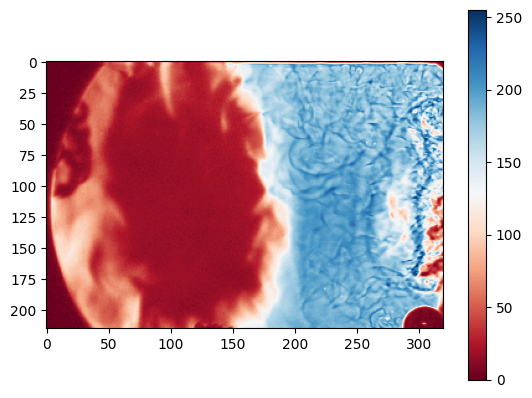

In [6]:
peg = plt.imshow(cropped_data[200], cmap='RdBu')
plt.colorbar(peg)

In [7]:
cropped_data[0].shape

(215, 320)

In [8]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(cropped_data[i], (3, 3), 3))
patches = np.array(patches)

In [9]:
patches.shape

(3046, 71, 106, 3, 3)

In [10]:
%who

cropped_data	 data	 i	 k	 loc_P04	 np	 patches	 patchify	 peg	 
plt	 


In [11]:
mean = np.zeros(patches.shape[:3])
median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [12]:
mean.shape

(3046, 71, 106)

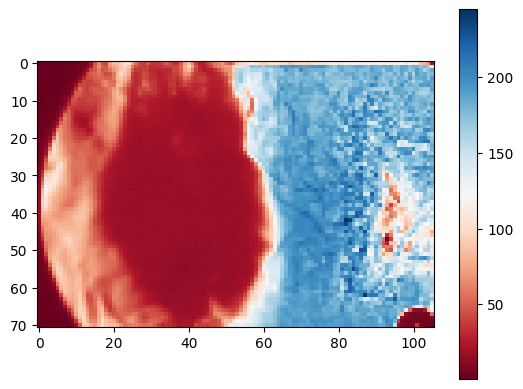

In [13]:
neg = plt.imshow(np.array(mean[100]), cmap='RdBu')
plt.colorbar(neg)

In [14]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

92.5877316797597


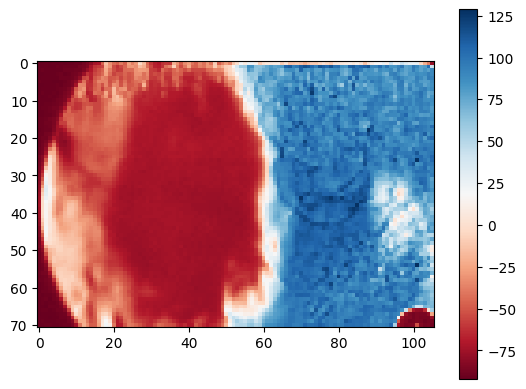

In [15]:
neg = plt.imshow(np.array(mean_adj[10]), cmap='RdBu')
plt.colorbar(neg)

In [16]:
from scipy.fft import fft, fftfreq
fft_sig_mean = np.zeros_like(mean).astype(np.complex64)
fft_sig_median = np.zeros_like(median).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig_mean[:, i, j] = fft(mean_adj[:, i, j])
            # fft_sig_median[:, i, j] = fft(median[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])

In [17]:
fft_sig_mean.shape

(3046, 71, 106)

In [18]:
n = fft_sig_mean.shape[0]  # Number of data points
sampling_rate = 2 * 1000 # Adjust this if your data is sampled differently
frequencies = np.fft. fftfreq(n, d=1/sampling_rate)

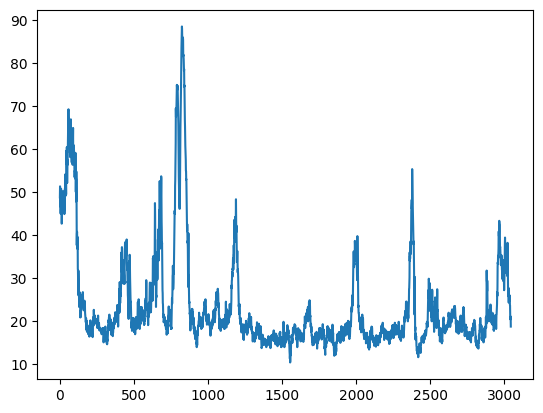

In [19]:
plt.plot(mean[: ,21,20])
# plt.xlim([0,1000])

In [20]:
frequencies.shape

(3046,)

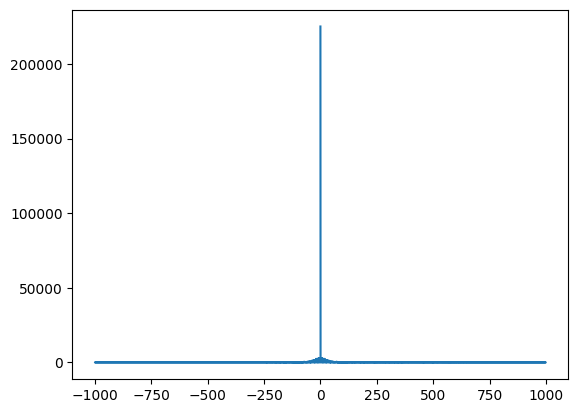

In [21]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,21,32]))
# plt.xlim([0,sampling_rate/2])

In [22]:
np.absolute(fft_sig_mean[: ,21,31]).shape

(3046,)

In [23]:
# np.absolute(fft_filter_1000[100:int(frequencies.shape[0]/2)]).shape

(0.0, 1000.0)

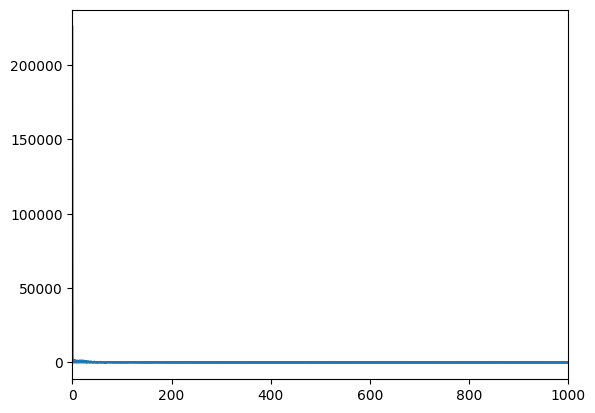

In [24]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,21,33]))
plt.xlim([0,sampling_rate/2])

(0.0, 1000.0)

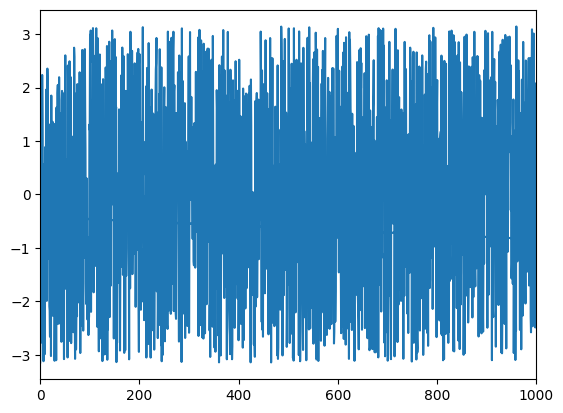

In [25]:
plt.plot(frequencies,np.angle(fft_sig_mean[:,21,33]))
plt.xlim([0,sampling_rate/2])

In [26]:
fft_ravel = np.reshape(fft_sig_mean, [np.array(cropped_data).shape[0], fft_sig_mean.shape[1]*fft_sig_mean.shape[2]])

In [27]:
abs(fft_ravel).max()

338463.56

### scalegram

In [28]:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
 
def anime(x, sig):
    fig, ax = plt.subplots(1, 1)
    # fig.set_size_inches(5,5)
    
    def animate(i):
        ax.clear()
        # Get the point from the points list at index i
        point = abs(sig[:,i])
        # Plot that point using the x and y coordinates
        ax.plot(x, point, 
                label='original',)
        ax.set_title('Pixel = {0:4d} and its FFT plot'.format(i))
        # Set the x and y axis to display a fixed rangeFrame
        ax.set_xlabel("Freq")
        ax.set_ylabel("abs(FFT)")
        ax.set_xlim([0, sampling_rate/2])
        ax.set_ylim([0, 5000])
        # ax.set_ylim([0, 1])
    ani = FuncAnimation(fig, animate, frames=sig.shape[1], interval=500, repeat=True)
    plt.close()
    display(HTML(ani.to_jshtml()))

In [29]:
fft_filter_1000 = np.zeros_like(fft_ravel)

for i in range(fft_ravel.shape[1]):
      for k in range(fft_ravel.shape[0]):
        if (abs(fft_ravel[k][i]<1000)):
            fft_filter_1000[k][i] = 0
        else:
            fft_filter_1000[k][i] = fft_ravel[k][i]

In [30]:
fft_filter_1000.shape

(3046, 7526)

In [31]:
# anime(frequencies, fft_filter_1000)

In [32]:
# anime(frequencies, fft_ravel)

In [33]:
# plt.plot(frequencies[abs(fft_filter_1000[:, 2689]))

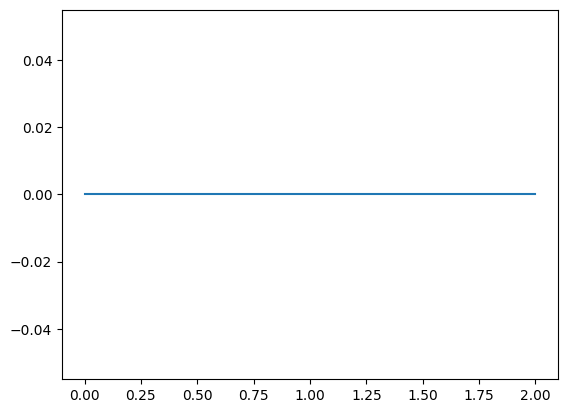

In [34]:
plt.plot(abs(fft_filter_1000[:, 44])[606:609])

In [35]:
#To save the FFT plots

def fft_plots(loc, name, sig):
    for i in range(sig.shape[1]):
        plt.plot(frequencies, abs(sig[:, i]))
        plt.title('Pixel = {0:4d} and its FFT plot'.format(i))
    # Set the x and y axis to display a fixed rangeFrame
        plt.xlabel("Freq")
        plt.ylabel("abs(FFT)")
        plt.xlim([0, sampling_rate/2])
        plt.ylim([0, 5000])
        exec(f'plt.savefig(loc+name+str({i}))')
        plt.show()

In [36]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/1000_filter/'
# name = 'pixel_FFT_1000_'
# fft_plots(loc,name, fft_filter_1000)

In [37]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/No_filter/'
# name = 'Pixel_FFT_noFilter_'
# fft_plots(loc,name, fft_ravel)

In [38]:
# from matplotlib.animation import FFMpegWriter
# # Save the animation as an animated GIF
# f = 'FFT_demonstration.mp4'
# writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(f, writer=writer)

In [39]:
fft_filter_1000[0:int(frequencies.shape[0]/2)].shape

(1523, 7526)

In [40]:
freq_pre = np.zeros_like(fft_filter_1000, dtype=np.float32)
for i in range(fft_filter_1000.shape[0]):
    for j in range(fft_filter_1000.shape[1]):
        if fft_filter_1000[i][j] == 0:
            freq_pre[i][j] = 0
        else:
            freq_pre[i][j] = frequencies[i]

In [41]:
freq_pre.shape

(3046, 7526)

In [42]:
# Creating a tensor of values for bar graph plotting
def ten_val(x_data):
    x_data_ten = []
    for i in range(x_data.shape[0]):
        k = []
        for j in range(x_data.shape[1]):
            if x_data[i][j] != 0:
                k.append(x_data[i][j])
        x_data_ten.append(k)
    return x_data_ten

In [44]:
# Preparing data for the 3D plotting 

x_data = freq_pre[0:int(freq_pre.shape[0]/2)].astype(np.int32)
y_data = np.absolute(fft_filter_1000[0:int(freq_pre.shape[0]/2),:]).astype(np.int32)

print(x_data.shape, y_data.shape)

(1523, 7526) (1523, 7526)


In [45]:
# freq_pre[:freq_pre.shape[0]/2].shape

In [46]:
for i in range(x_data.shape[0]):
    for j in range(x_data.shape[1]):
        if x_data[i][j] == 0:
            y_data[i][j] = 0

In [47]:
def arrange(x, y):
    x_data_sort = np.zeros_like(x)
    y_data_sort = np.zeros_like(y)
    for i in range(x.shape[1]):
        idx = np.argsort(y[:,i])
        x_data_sort[:, i] = x[:, i][idx]
        y_data_sort[:, i] = y[:, i][idx]
    return(x_data_sort, y_data_sort)

In [48]:
x_data_sort, y_data_sort = arrange(x_data, y_data)

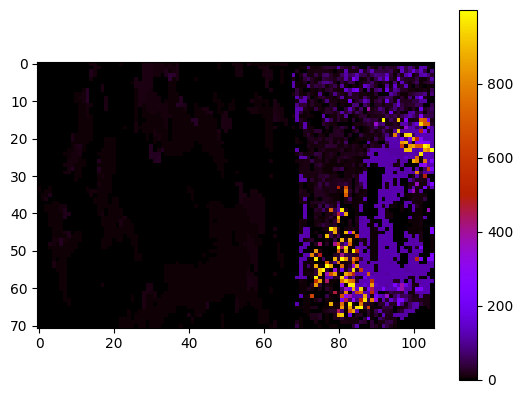

In [49]:
peg = plt.imshow(x_data_sort[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)
# plt.imsave(peg)

In [50]:
def thresh(x, y, the1, the2):
    arr1 = np.zeros_like(x)
    arr2 = np.zeros_like(y)
    arr1 = np.where(x>the1, x, 0)
    arr1 = np.where(arr1>the2, 0, arr1)
    arr2 = np.where(arr1>1, 1, 0)
    arr2 = arr2*y
    return(arr1, arr2)

In [51]:
x_data_fil, y_data_fil = thresh(x_data_sort, y_data_sort, 100, 160)

In [52]:
np.unique(y_data_fil)

array([    0,  1000,  1001, ..., 12675, 12944, 13267])

In [53]:
np.unique(x_data_fil[-1, :])

array([  0, 101, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 128, 129, 130,
       132, 133, 135, 136, 139, 141, 145, 146, 150, 153, 154, 158],
      dtype=int32)

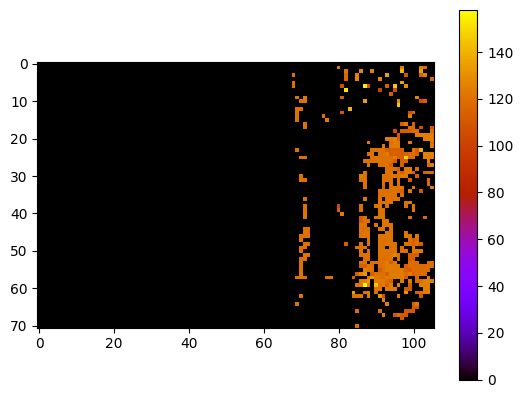

In [54]:
peg = plt.imshow(x_data_fil[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

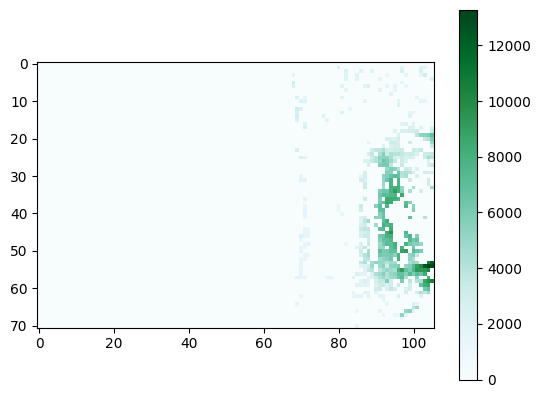

In [55]:
peg = plt.imshow(y_data_fil[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="BuGn")
plt.colorbar(peg)

In [56]:
y_data.shape

(1523, 7526)

In [57]:
mean_adj.shape

(3046, 71, 106)

In [58]:
sig = np.array(mean_adj[:, 55, 104])

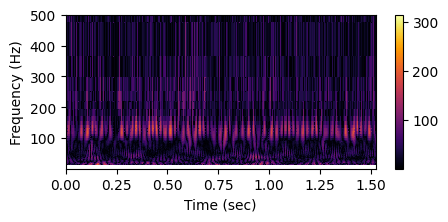

In [61]:
import pywt 



fs = sampling_rate
sampling_period = 1/fs
t = np.linspace(0, mean_adj.shape[0], mean_adj.shape[0])
t = t/fs

wavelet = 'morl'
scale = np.arange(1, 200)


f = pywt.scale2frequency(wavelet, scale)/sampling_period 

coef, freqs = pywt.cwt(sig, scale, wavelet=wavelet,
                       sampling_period=sampling_period)



# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
neg = plt.pcolor(t, freqs, abs(coef), cmap='inferno')
plt.colorbar(neg)
# Set yscale, ylim and labels
# plt.yscale('log')
plt.ylim([1, 500])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg_german.png', dpi=150)

In [ ]:
t.shape

(3046,)

In [ ]:
def indi_fe(x, y):
    a = []
    b = []
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] < 120:
                a.append(x[i][j])
                b.append(y[i][j])
    a = np.array(a)
    b = np.array(b)
    return a, b

In [ ]:
a, b = indi_fe(x_data_fil, y_data_fil)

In [ ]:
import pandas as pd

a_idx = np.argsort(b)

a_sort = a[a_idx]
b_sort = b[a_idx]

In [ ]:
# plt.bar(a, b)

In [ ]:
df = pd.DataFrame(a_sort, b_sort)

df

,0
0,0
0,0
0,0
0,0
0,0
...,...
25174,4
25529,4
25647,4
26141,4


(array([2.075e+03, 6.180e+02, 9.320e+02, 3.170e+02, 2.640e+02, 1.036e+03,
        7.500e+01, 6.700e+01, 2.070e+02, 5.200e+01, 8.100e+01, 1.880e+02,
        6.200e+01, 5.400e+01, 6.600e+01, 2.900e+01, 2.400e+01, 7.600e+01,
        1.300e+01, 1.800e+01, 4.000e+01, 1.000e+01, 5.700e+01, 1.400e+01,
        1.300e+01, 2.300e+01, 7.000e+00, 1.500e+01, 2.900e+01, 6.000e+00,
        5.000e+00, 1.600e+01, 9.000e+00, 6.000e+00, 2.600e+01, 1.200e+01,
        4.000e+00, 1.500e+01, 2.000e+00, 9.000e+00, 9.000e+00, 6.000e+00,
        1.200e+01, 5.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 5.000e+00,
        7.000e+00, 4.000e+00, 3.000e+00, 1.200e+01, 6.000e+00, 5.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        6.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 8.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 7.000e+0

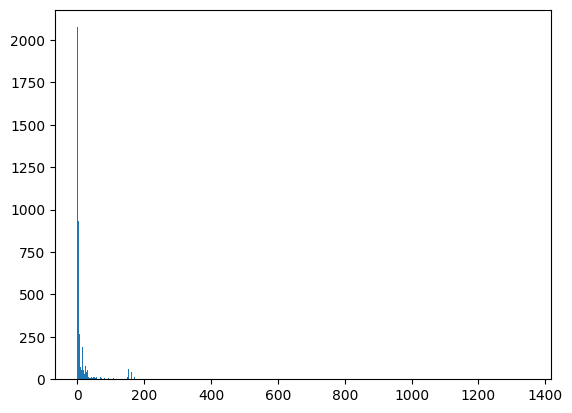

In [ ]:
plt.hist(x_data_sort[-1, :], bins=1000)
# plt.xlim(xmin=50, xmax=150)
# plt.ylim(ymin=0, ymax=100000)

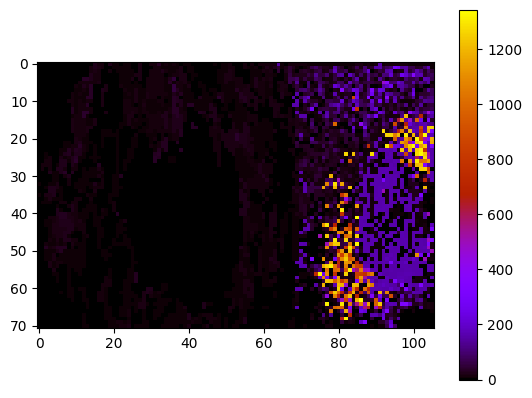

In [ ]:
peg = plt.imshow(x_data_sort[-2, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

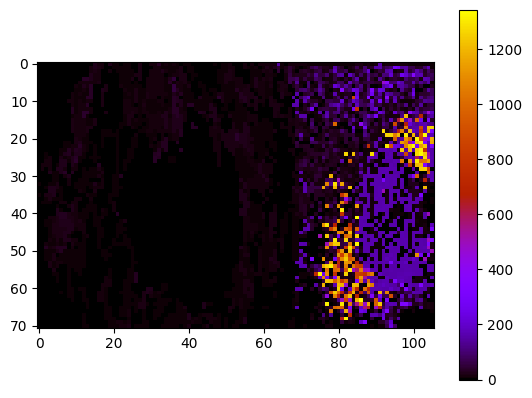

In [ ]:
peg = plt.imshow(x_data_sort[-2, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

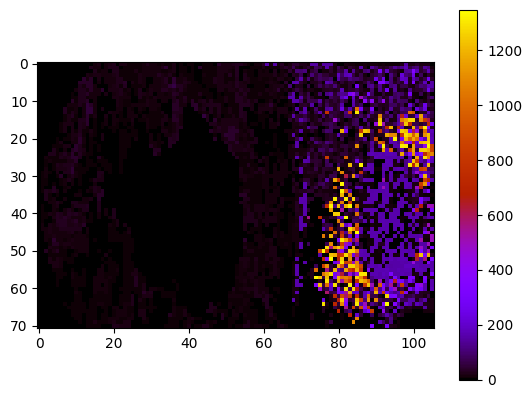

In [ ]:
peg = plt.imshow(x_data_sort[-3, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

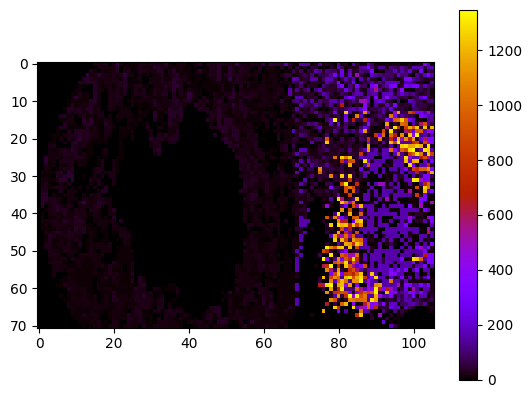

In [ ]:
peg = plt.imshow(x_data_sort[-4, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

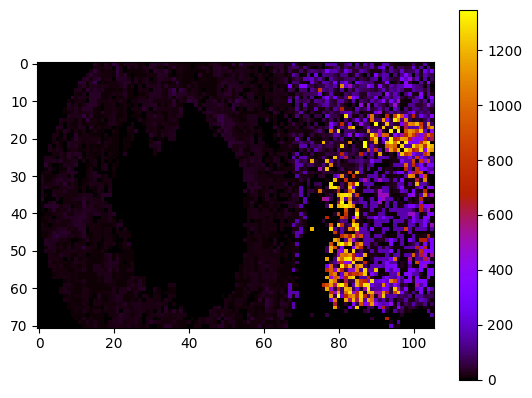

In [ ]:
peg = plt.imshow(x_data_sort[-5, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

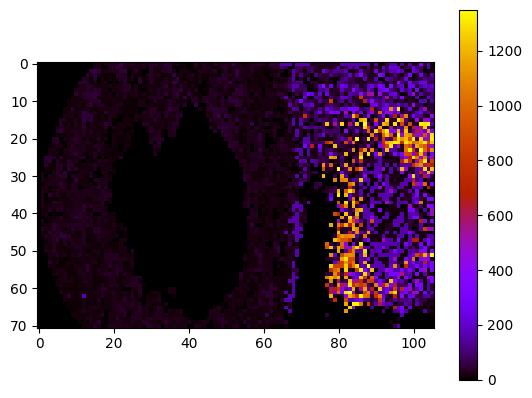

In [ ]:
peg = plt.imshow(x_data_sort[-6, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

In [ ]:
# np.unique(x_data_con_sort[455])

In [ ]:
# y_data_con_sort.shape

In [ ]:
y_data.max()

45987